<a href="https://colab.research.google.com/github/y-nagayoshi/machine-learning-starting-with-Python/blob/main/6%E7%AB%A0_%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E3%83%81%E3%82%A7%E3%83%BC%E3%83%B3%E3%81%A8%E3%83%91%E3%82%A4%E3%83%97%E3%83%A9%E3%82%A4%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train, y_train)

In [2]:
X_train_scaled = scaler.transform(X_train)

svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
svm.score(X_test_scaled, y_test)

0.972027972027972

In [6]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svm", SVC())
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.972027972027972

In [10]:
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [11]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

0.9812311901504789

In [12]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svm", SVC(C=100))
])

pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [15]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))

Pipeline steps:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [19]:
pipe.fit(cancer.data)
components = pipe.named_steps["pca"].components_
components.shape

(2, 30)

In [20]:
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [21]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]
}

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=4
)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [23]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])

In [26]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.4475566 , -0.34609376, -0.41703843, -0.52889408, -0.15784407,
         0.60271339, -0.71771325, -0.78367478,  0.04847448,  0.27478533,
        -1.29504052,  0.05314385, -0.69103766, -0.91925087, -0.14791795,
         0.46138699, -0.1264859 , -0.10289486,  0.42812714,  0.71492797,
        -1.08532414, -1.09273614, -0.85133685, -1.04104568, -0.72839683,
         0.07656216, -0.83641023, -0.64928603, -0.6491432 , -0.42968125]])

In [31]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge()
)

In [34]:
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [35]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

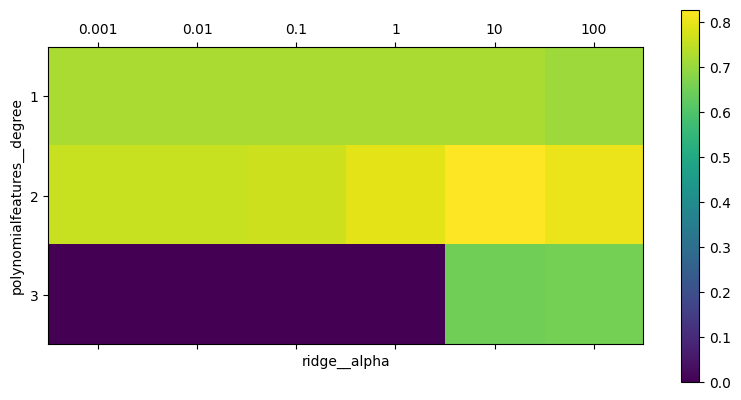

In [37]:
import matplotlib.pyplot as plt


plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1),
            vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
           param_grid['polynomialfeatures__degree'])

plt.colorbar()

In [38]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [39]:
grid.score(X_test, y_test)

0.7683045464100129

In [40]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.6272671927504456

In [43]:
pipe = Pipeline([
    ('preprocessing', StandardScaler()),
    ('classifier', SVC())
])

from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {
        'classifier': [SVC()],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [RandomForestClassifier(n_estimators=100)],
        'classifier__max_features': [1, 2, 3],
        'preprocessing': [None],
    }
]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_params_

{'classifier': SVC(), 'classifier__C': 10, 'classifier__gamma': 0.01}